In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# One-hot encode labels
y = to_categorical(y)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
def create_model(regularizer=None, dropout_rate=None):
    model = Sequential()
    model.add(Dense(64, activation='tanh', input_shape=(4,), kernel_regularizer=regularizer))
    if dropout_rate:
        model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='tanh', kernel_regularizer=regularizer))
    if dropout_rate:
        model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu', kernel_regularizer=regularizer))
    model.add(Dense(3, activation='softmax'))

    return model



In [ ]:
### Step 3: Train Models with Different Regularizations

def train_and_evaluate(model, X_train, y_train, X_test, y_test, title):
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=200, batch_size=512, validation_data=(X_test, y_test), verbose=0)

    # Plot training history
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    _, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f'Test Accuracy: {test_acc:.4f}')



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


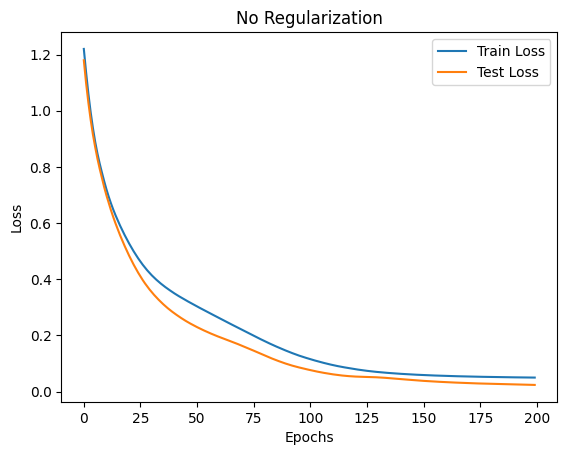

Test Accuracy: 1.0000


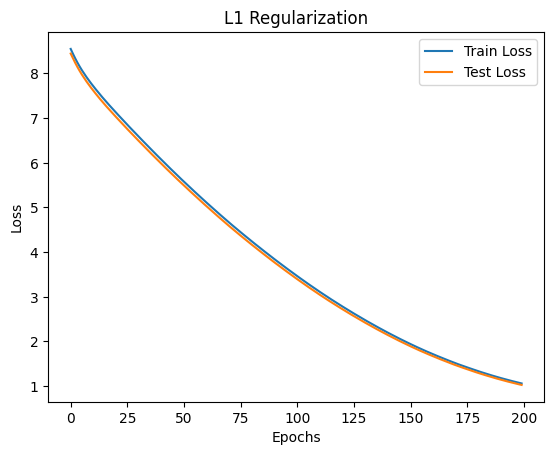

Test Accuracy: 1.0000


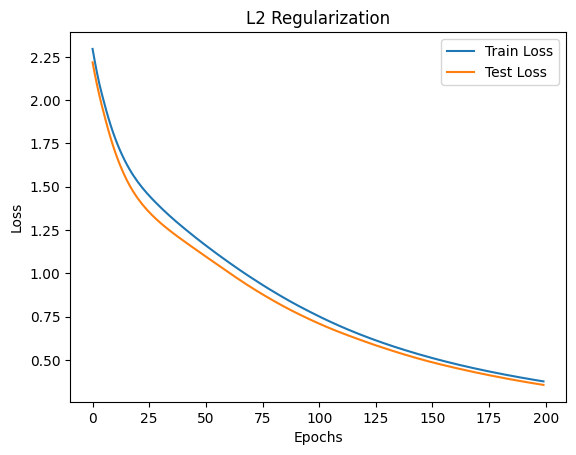

Test Accuracy: 1.0000


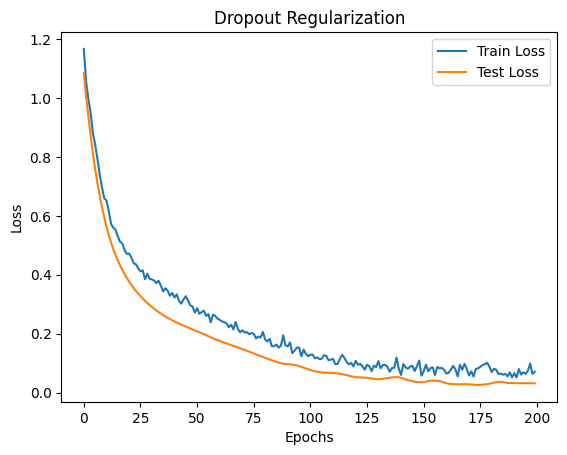

Test Accuracy: 1.0000


In [ ]:
# Train models without regularization and with L1, L2, Dropout
train_and_evaluate(create_model(), X_train, y_train, X_test, y_test, 'No Regularization')
train_and_evaluate(create_model(regularizer=l1(0.01)), X_train, y_train, X_test, y_test, 'L1 Regularization')
train_and_evaluate(create_model(regularizer=l2(0.01)), X_train, y_train, X_test, y_test, 'L2 Regularization')
train_and_evaluate(create_model(dropout_rate=0.2), X_train, y_train, X_test, y_test, 'Dropout Regularization')


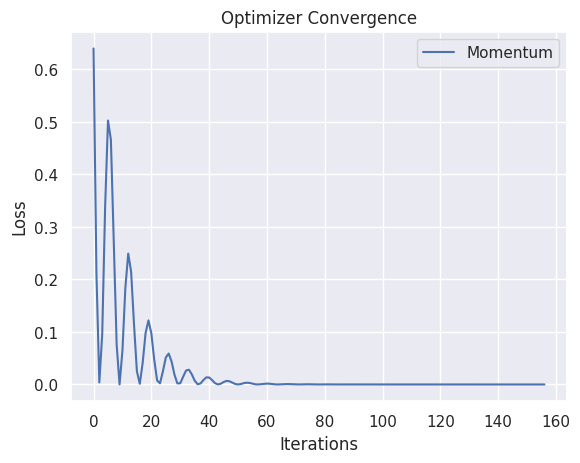

In [ ]:
## Part 2: Implementing Optimizers from Scratch

### Step 1: Define the Loss Function and Gradients

# Loss function f(m) = m^2 - 2m + 1
def loss_function(m):
    return m**2 - 2*m + 1

# Gradient of the loss function
def gradient(m):
    return 2*m - 2


def momentum_optimizer(lr=0.1, gamma=0.9, init_m=0):
    m, v, t = init_m, 0, 1
    history = []
    while True:
        g = gradient(m)
        v = gamma * v + lr * g
        m_new = m - v
        history.append(loss_function(m_new))
        if np.isclose(m, m_new, atol=1e-6): break
        m = m_new
    return history

# Plot the loss curves for different optimizers
sns.set(style='darkgrid')
plt.plot(momentum_optimizer(), label='Momentum')
plt.title('Optimizer Convergence')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [ ]:

## Part 3: Implement Pretrained Model Comparison

from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import cifar10

# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

# Load pretrained model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))

# Add custom layers
model = Sequential()
model.add(base_model)
model.add(keras.layers.Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Train model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
110/782 ━━━━━━━━━━━━━━━━━━━━ 1:06:02 6s/step - accuracy: 0.1165 - loss: 9.3254

KeyboardInterrupt: 